# Machine Learning (ML) Documentation
This notebook follows documentation written in response to samples from personal research and the structure of the reference text, **The Python Workshop Second Edition**,Second Edition, by Wade, Mario Corchero Jiménez, Bird, Dr. Lau Cher Han, Lee. 

This notebook will also largely follow the implementation of tools in `pandas`, `numpy`, `matplotlib`, and `scikit-learn`.
+ https://pandas.pydata.org
+ https://numpy.org
+ https://matplotlib.org/
+ https://scikit-learn.org/

Note that the package name for `skylearn` is `scikit-learn`, as some documentation mixes up these names.

In [9]:
"""It is recommended to install the required packages above in your venv or conda.
Run this code before any examples in this notebook."""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

# Other libraries from the skylearn package will be included later.

## Chapter 11
The main focus of this chapter is to introduce several kinds of ML, such as
+ Linear Regression
+ Logistic Regression
+ Decision Trees
+ Random Forests
+ Naive Bayes
+ Adaptive Boosting (AdaBoost)
+ Extreme Gradient Boosting (XGBoost)

Other methods beyond constructing these algorithms are the Ridge and Lasso algorithms which are variations of Linear Regression.

It is possible to use "regularization and cross-validation to obtain accurate results with data that the algorithm has never seen before", specifically *within the data range given in the test set.*

### Linear Regression
**"ML is the ability of computers to learn from data.** The first step in building a ML algorithm is deciding what you want to predict."

When looking at a DataFrame, you want to choose a column or selection of data as a **target**. This is what the algorithm will be trained to predict. This relationship between multivariate data and a single column generally indicates that the algorithm of choice is some sort of **linear regression**.

The general process for choosing a method to model some behavior is to find an equation that best suits the intended or expected behavior of some data. This directly correlates to the field of statistics, where a model (either linear, quadratic, sinusoidal, or complex) can be used to match the shape of data. However, this model can be used to *predict* data within the range of the original set.
+ We generally do not assume that the models created from some sample set will be accurate for extrapolated data.

So, to simplify this introduction to linear regression, let's do a simple boxplot about two pieces of data. Since this notebook follows the lessons from the textbook mentioned above, a lot of the data modeling will occur with the `Sample_HousingData.csv` file included in this repo.

Let's start by choosing two variables to create an x-y scatterplot. The CSV has many columns,but we will use the example that relates the number of bedrooms to the median house value.

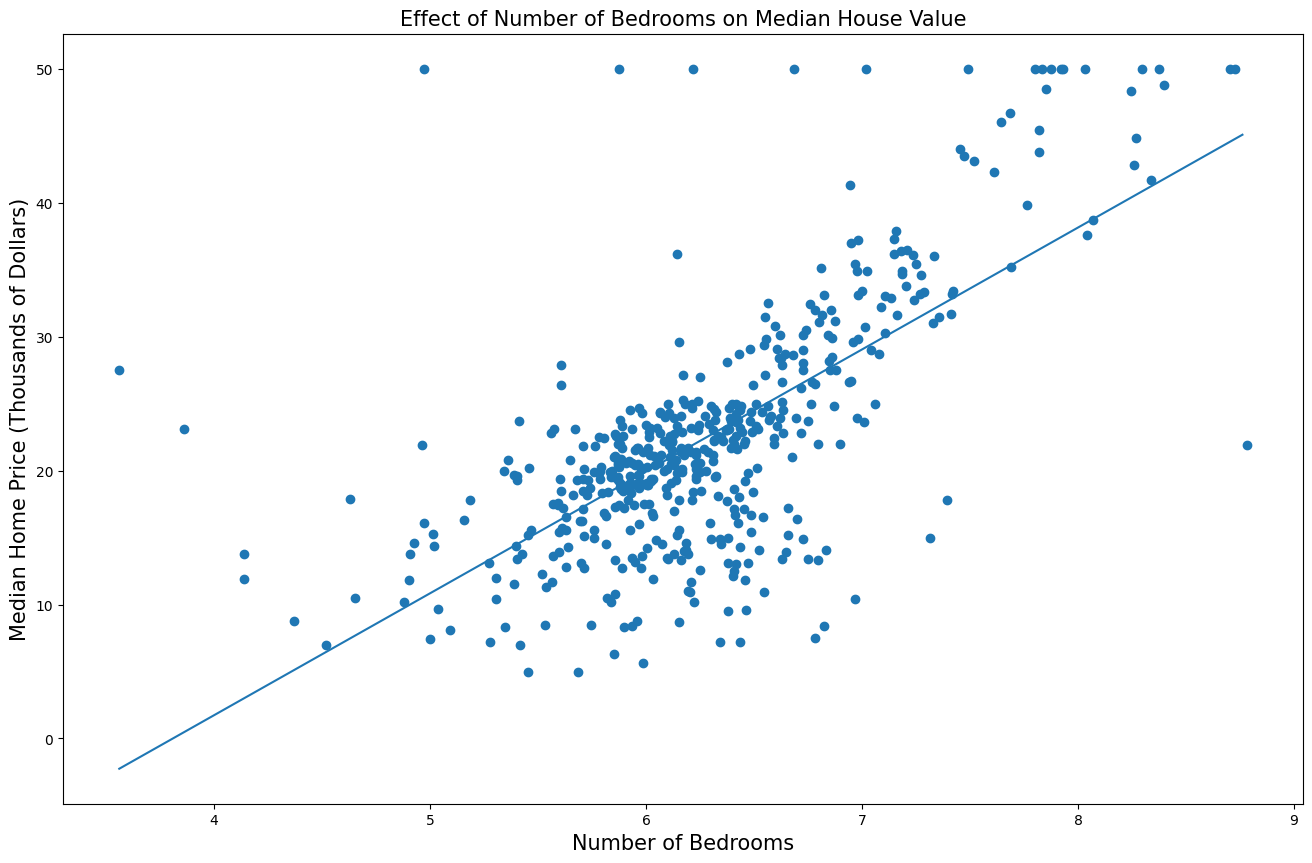

In [10]:
# Configure dataset from the csv in the repo
df = pd.read_csv("Sample_HousingData.csv")

plt.figure(figsize = (16 , 10))
plt_title = "Effect of Number of Bedrooms on Median House Value"
plt.title(plt_title, size = 15)
plt.xlabel("Number of Bedrooms", 
           loc = "center", 
           fontsize = 15)
plt.ylabel("Median Home Price (Thousands of Dollars)", 
           loc = "center",
            fontsize = 15)

# Create a basic scatter plot of these two data columns
# Note that this follows basic statistics, but the point of ML is that we can use
# multivariable datasets to contribute to the impact of a single variable.
plt.scatter(x = df["RM"], y = df["MEDV"])

# We can also use a line of best fit to show the general relationship of these data
slope, intercept = np.polyfit(df["RM"], df["MEDV"], 1)
x_line = np.arange(df["RM"].min(), df["RM"].max(), 0.1)
y_line = slope * x_line + intercept
plt.plot(x_line, y_line)


As is shown above, it is clear that basic statistical programming can be used to show a *relationship* between some data, but if we want to predict (or learn) about the data from a sample, we can likely use a line of best fit or other prediction model to somewhat accurately predict what an unknown input will output.

This leads us to using multiple variables to train some model to make more complex predictions than two-dimensional graphs. 

## From one to N-dimensions
**"Dimensionality is an important concept in ML."** In math, we may use two or three dimensions with various kinds of planes or domains.
+ In ML, the number of dimensions is often the number of **predictor** columns.

So, we need not a limit for one-dimensional prediction. Previously, we used the basic *y = mx + b* formula to create a prediction line. Now we can use an arbitrary number of variables (or dimensions) in the format "*Y = MX + B* where all variables Y, M, and X are vectors of arbitrary length."
+ We also typically refer to *M* as the **weight** instead of slope in this case.
+ Linear algebra is the basis for this expansion. Since many datasets can be represented in the format of *m, n* matrices, we can create relationships between columns/rows.
+ The weight is typically a numerical coefficient for each entry into the training set that is multiplied by the number of column entries and summed, eventually coming closer and closer to the target value.

## The Linear Regression Algorithm
To explicitly demonstrate what each library can be used for in Python, we will cover them here. This is directly referenced from the text:
+ `pandas`: All data processing can be handled through pandas (loading, reading, viewing, cleaning, manipulating, etc.).
+ `numpy`: Mathematical computations beyond the scope of pandas
+ `LinearRegression`: A new library that is used for the building, training, and testing of the linear regression models. This library places weights on each column added to the training set and adjusts them until it finds an optimal solution to predict the target column. (Optimization is done by least-squares optimization, a form of statistical analysis to reduce errors: https://en.wikipedia.org/wiki/Least_squares)
+ `mean_square_error`: Allows the algorithm to test itself using the mean of the squared errors from predictions to real data.
+ `train_test_split`: Allows us to split the data into a training set and a test set. This allows us to test our models right away and make changes without further deliberation.

Generally, most of the data will be used to train the model (**about 80%**), while the remaining is used for the test set.
+ The 80/20 split is default, but it can be adjusted.

All of the libraries other than numpy and pandas are part of the `scikit-learn` package. 

We will now continue to use multiple variables to train and test a ML model using linear regression.

In [11]:
#%pip install scikit-learn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Read the data from the given CSV and clean
df = pd.read_csv("Sample_HousingData.csv", na_values=["", " ", "NA", "N/A"])
df = df.dropna()

# Check that dropna() does its job:
assert not df.isnull().values.any(), "Data set contains some NaNs!"

# The standard notation is to use X for the predictor columns and y for the target
# We can now declare the X and y variables as needed (i.e. all columns but the target)
# Since the last column is the target column, we can index as shown below
X = df.iloc[:, :-1]             # All but the last column
y = df.iloc[:, -1]              # Just the last column

# As mentioned above, we can use the train_test_split() function to split X and y into
# training and test sets.

# Note that the test_size parameter defines the test set size (20% of the data in this case)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Instead of writing our own linear regression model (fun), we can just use the library we
# imported above.
# See the documentation about the regression model. We must configure it after initializing
# the class object.
reg = LinearRegression()
reg.fit(X_train, y_train)       # X is the training data, y is the target values (actual)

LinearRegression()

We should now have a ML algorithm that can predict the median house value from all of these data. Thus, we can now being the testing procedure.

There are several ways to test the accuracy of the model, either by directly comparing a prediction to unseen data from the model, or by creating procedure that validates the model automatically.

The general method is to use the `predict()` function. We can then use the `mean_squared_error` library to assess the accuracy of this model.

In [ ]:
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning)

# The predict() function takes rows of data and produces the corresponding output with the model
# already created.
y_prediction = reg.predict(X_test)

# Now we can use some statistical analysis to see how far away we are from the real values in the
# test set.
# This uses the mean_squared_error library that we had to import, but you can also use looping
# to compute the squared errors.
rmse = np.sqrt(mean_squared_error(y_test, y_prediction))
print(f'RMSE: {rmse}')

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD          int64
TAX          int64
PTRATIO    float64
B          float64
LSTAT      float64
dtype: object
RMSE: 5.371207757773573


/Users/colin/Documents/GitHub/MLLearning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/colin/Documents/GitHub/MLLearning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/colin/Documents/GitHub/MLLearning/.venv/lib/python3.13/site-packages/sklearn/linear_model/_base.py:279: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


**"The square of the root mean squared error is a standard choice with linear regression."** There are a plethora of methods that you can use to compare the accuracy of these results to the data in the sample, but for now we are solely concern with the actual implementation of these ML algorithms.

## Linear Regression Function
ML models do not always return the same functionality because of how the training and testing sets are created. This implies that the pseudo-randomness of the testing sets will create some variation in our results.

It is common to **minimize fluctuation** in the training and testing sets. The process to do this is called **cross-validation** or **CV**.